## 1. What are the most demanded skills for the top 3 most popular data roles?

In [8]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

In [9]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [10]:
df_DE = df[(df['job_country'] == 'Germany') & (df['job_schedule_type'] == 'Full-time')]
df_skills = df_DE.explode('job_skills')
df_skills[['job_title','job_skills']]

,job_title,job_skills
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",python
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",sql
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",c#
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",azure
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",airflow
...,...,...
785682,Data Scientist für datengetriebene Entwicklung...,python
785682,Data Scientist für datengetriebene Entwicklung...,hadoop
785682,Data Scientist für datengetriebene Entwicklung...,spark
785682,Data Scientist für datengetriebene Entwicklung...,airflow


In [11]:
df_skills_count = df_skills.groupby(['job_title_short','job_skills']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_title_short,job_skills,skill_count
667,Data Scientist,python,3614
491,Data Engineer,python,3171
521,Data Engineer,sql,2853
330,Data Analyst,sql,2608
306,Data Analyst,python,2017
...,...,...,...
1002,Senior Data Engineer,next.js,1
220,Data Analyst,centos,1
996,Senior Data Engineer,mattermost,1
993,Senior Data Engineer,mariadb,1


In [12]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

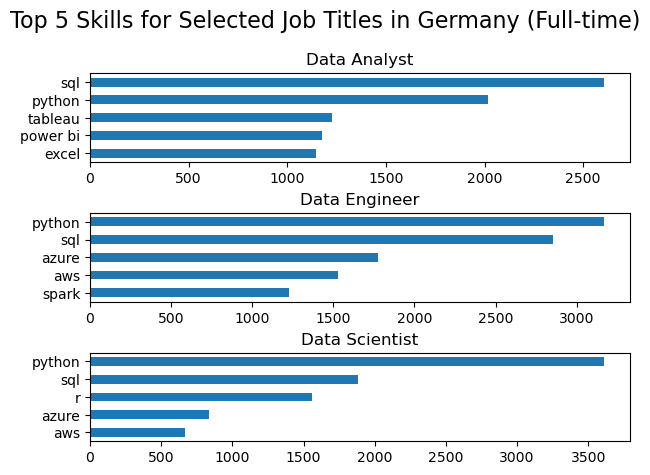

In [15]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Top 5 Skills for Selected Job Titles in Germany (Full-time)', fontsize=16)
fig.tight_layout(h_pad=0.5)
plt.show()

In [17]:
df_job_title_count = df_DE['job_title_short'].value_counts().reset_index(name='jobs_total')

In [18]:
df_skills_percent = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_percent['skill_percent'] = (df_skills_percent['skill_count'] / df_skills_percent['jobs_total']) * 100
df_skills_percent

,job_title_short,job_skills,skill_count,jobs_total,skill_percent
0,Data Scientist,python,3614,5895,61.306192
1,Data Engineer,python,3171,6066,52.274975
2,Data Engineer,sql,2853,6066,47.032641
3,Data Analyst,sql,2608,6280,41.528662
4,Data Analyst,python,2017,6280,32.117834
...,...,...,...,...,...
1358,Senior Data Engineer,next.js,1,1910,0.052356
1359,Data Analyst,centos,1,6280,0.015924
1360,Senior Data Engineer,mattermost,1,1910,0.052356
1361,Senior Data Engineer,mariadb,1,1910,0.052356


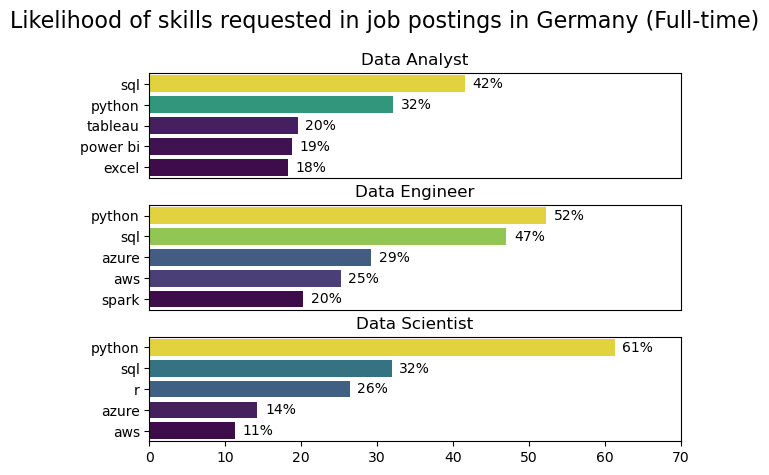

In [23]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='viridis')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0, 70)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f"{v:.0f}%", color='black', va='center')
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of skills requested in job postings in Germany (Full-time)', fontsize=16)
fig.tight_layout(h_pad=0.5)
plt.show()